# Gather
- twitter archive using on-hand file
- image predictions file by programmatic download
- missing data using the twitter API and tweepy

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import time
import numpy as np

In [2]:
# load twitter archive with 2356 tweet details
ratings = pd.read_csv('twitter-archive-enhanced.csv')
ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# tweet image predictions url
image_predictions_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
# programmatically download the image predictions file
response = requests.get(image_predictions_url)
with open(image_predictions_url.split('/')[-1], 'wb') as file:
        file.write(response.content)

In [5]:
# load image predictions
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key = # Enter key here
consumer_secret = # Enter secret here

In [7]:
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# random query to view the structure of the object returned
tweet = api.get_status(666020888022790149, tweet_mode='extended')
tweet._json

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 960, 'h': 720, 'resize': 'fit

In [11]:
# query the api using tweet_id Series from the ratings DataFrame
start = time.time()
deleted = []
for _id in ratings['tweet_id']:
    try:
        tweet = api.get_status(_id, tweet_mode='extended')
        with open('tweet_json.txt', 'a') as file:
            json.dump(tweet._json, file)
            file.write('\n')
    except:
        deleted.append(_id)
    print(_id)
        
print(time.time()-start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272


Rate limit reached. Sleeping for: 234


758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322

705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345

678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 267


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029

In [9]:
# create DataFrame using the id, retweet_count, and favorite_count fields as columns.
tweets_json = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweets_json.append(tweet)
        
tweet_counts = pd.DataFrame(tweets_json)
tweet_counts = tweet_counts[['id','retweet_count','favorite_count']]

In [10]:
# view tweet_counts
tweet_counts.head()

,id,retweet_count,favorite_count
0,892420643555336193,7547,35727
1,892177421306343426,5598,30869
2,891815181378084864,3707,23212
3,891689557279858688,7732,39015
4,891327558926688256,8335,37264


# Assess
- visual assessment
- programmatic assessment

In [11]:
ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
sum(ratings.duplicated())

0

In [14]:
sum(ratings.text.duplicated())

0

In [15]:
ratings.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [16]:
ratings.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [17]:
ratings.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Marlee       1
Sprout       1
Chef         1
Herb         1
Major        1
Name: name, Length: 957, dtype: int64

In [18]:
ratings[(ratings['name'] == 'a') | (ratings['name'] == 'an')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [19]:
ratings[ratings['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [20]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
tweet_counts

,id,retweet_count,favorite_count
0,892420643555336193,7547,35727
1,892177421306343426,5598,30869
2,891815181378084864,3707,23212
3,891689557279858688,7732,39015
4,891327558926688256,8335,37264
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,127,265
2328,666033412701032449,40,111
2329,666029285002620928,42,120


In [23]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


## Tidiness Issues
- `ratings`:
    1. doggo, floofer, pupper, puppo are expansions of one column, which is dog_stage.
- `tweet_counts`:
    1. `tweet_counts` data is considered a separate type of observational unit from the archive data in `ratings` table.
- `image_predictions`:
    1. (p1, p2, p3), (p1_conf, p2_conf, p3_conf), and (p1_dog, p2_dog, p3_dog) are not variables; each group is a variable on its own.

## Quality Issues
- `ratings`:
    1. Erroneous datatypes (timestamp: string -> datetime)
    2. 181 retweets
    3. Redundant columns constitute missing data (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)
    4. Null values represented as 'None' (doggo, floofer, pupper, puppo).
    5. Dog names under name column listed as the articles 'a' and 'an'; names cannot be extracted from text column and/or tweets are not dog ratings.   
    
     __New Issues Discovered By Visual Assessment After Tidiness Issues were corrected__
    6. Entries (1980, 232, 750) are not dog ratings.
    7. Entries 1839 and 1964 include valid names (Berta, Parthenon) in the text column but are incorrectly named 'an' per the name column.
    - edit to (5.):    
    Records [49, 468, 577, 740, 742] incorrectly named 'a' and names cannot be extracted.    
    Records [756, 1059, 1966] incorrectly named 'an' and names cannot be extracted.   
    Null values represented as 'None' (name).       
    
    __New Issues Discovered During Analysis Phase__
    8. Presence of outliers in the rating_numerator column hinders plausible analysis and visualizations.
- `image_predictions`:
    1. Erroneous datatype (img_num: int -> category)   
    __New Issues Discovered By Programmatic Assessment After Tidiness Issues were corrected__
    2. Erroneous datatype (prediction_level: int -> category)
- `tweet_counts`:
    1. 2331 entries compared to 2075 of `image_predictions` table; extra entries without corresponding images
    2. tweet_id column inconsistantly named id


# Clean

In [24]:
# create copies of the original DataFrames to prepare for cleaning
ratings_clean = ratings.copy()
image_predictions_clean = image_predictions.copy()
tweet_counts_clean = tweet_counts.copy()

*181 retweets*
## Define
- Drop all retweet records in the `ratings_clean` table.

## Code

In [25]:
mask = ratings_clean[ratings_clean['retweeted_status_id'].notnull()].index
ratings_clean = ratings_clean.drop(mask, axis=0)

## Test

In [26]:
ratings_clean[ratings_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


*Redundant columns constitute missing data (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)*
## Define 
- Drop redundant columns entirely as they are mostly NaN and not useful for analysis.

## Code

In [27]:
ratings_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'],
                  axis=1, inplace=True)

## Test

In [28]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


*Null values represented as 'None' (doggo, floofer, pupper, puppo).*
## Define 
- Replace 'None' with empty strings to prepare for tidying these columns as one dog could be in more than one stage.

## Code

In [29]:
ratings_clean.doggo.replace('None', '', inplace=True)
ratings_clean.floofer.replace('None', '', inplace=True)
ratings_clean.pupper.replace('None', '', inplace=True)
ratings_clean.puppo.replace('None', '', inplace=True)

## Test

In [30]:
ratings_clean.doggo.value_counts()

         2088
doggo      87
Name: doggo, dtype: int64

In [31]:
ratings_clean.floofer.value_counts()

           2165
floofer      10
Name: floofer, dtype: int64

In [32]:
ratings_clean.pupper.value_counts()

          1941
pupper     234
Name: pupper, dtype: int64

In [33]:
ratings_clean.puppo.value_counts()

         2150
puppo      25
Name: puppo, dtype: int64

*Tidiness: doggo, floofer, pupper, puppo are expansions of one column, which is dog_stage.*
## Define
- Create a new column 'dog_stage' made of all values in the columns doggo, floofer, pupper, and puppo separated by hyphens, where necessary, to maintain readability.
- Replace all empty strings with numpy.nan.
- Drop the columns doggo, floofer, pupper, and puppo.

## Code

In [34]:
ratings_clean['dog_stage'] = ratings_clean['doggo'] + ratings_clean['floofer'] + ratings_clean['pupper'] + ratings_clean['puppo']
ratings_clean['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [35]:
ratings_clean['dog_stage'].replace({'doggopupper': 'doggo-pupper', 'doggopuppo': 'doggo-puppo', 'doggofloofer': 'doggo-floofer'},
                                   inplace=True)

In [36]:
ratings_clean['dog_stage'].replace('', np.nan, inplace=True)

In [37]:
ratings_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## Test

In [38]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   dog_stage           344 non-null    object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


In [39]:
ratings_clean.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo-pupper      10
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [40]:
ratings_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1021,746726898085036033,2016-06-25 15:29:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Abby. She's incredibly distracting. Just ...,https://twitter.com/dog_rates/status/746726898...,12,10,Abby,NaN
400,824775126675836928,2017-01-27 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,NaN
1588,686730991906516992,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,https://twitter.com/dog_rates/status/686730991...,12,10,None,NaN
20,888078434458587136,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,NaN
268,841439858740625411,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14,10,None,NaN


*2331 entries in `tweet_counts` table compared to 2075 of `image_predictions` table; extra entries without corresponding images*
## Define
- Drop entries in `tweet_counts_clean` that do not exist in `image_predictions_clean`, based on tweet_id, to avoid having values of `tweet_counts_clean` for entries without images in the `ratings_clean` table after the 2nd tidying step.

## Code

In [41]:
images_tweet_ids = list(image_predictions_clean.tweet_id)
mask = tweet_counts_clean.id.isin(images_tweet_ids)
tweet_counts_clean = tweet_counts_clean[mask]

## Test

In [42]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2059 non-null   int64
 1   retweet_count   2059 non-null   int64
 2   favorite_count  2059 non-null   int64
dtypes: int64(3)
memory usage: 64.3 KB


*tweet_id column inconsistantly named id*
## Define 
- Rename id in `tweet_counts_clean` as tweet_id to facilitate the second tidying step.

## Code

In [43]:
tweet_counts_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

## Test

In [44]:
list(tweet_counts_clean)

['tweet_id', 'retweet_count', 'favorite_count']

*Tidiness: `tweet_counts` data is considered a separate type of observational unit from the archive data in `ratings` table.*
## Define
- Join `tweet_counts_clean` and `ratings_clean` on tweet_id using inner join technique.

## Code

In [45]:
ratings_clean = ratings_clean.merge(tweet_counts_clean, how='inner', on='tweet_id')

## Test

In [46]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1987 non-null   int64 
 1   timestamp           1987 non-null   object
 2   source              1987 non-null   object
 3   text                1987 non-null   object
 4   expanded_urls       1987 non-null   object
 5   rating_numerator    1987 non-null   int64 
 6   rating_denominator  1987 non-null   int64 
 7   name                1987 non-null   object
 8   dog_stage           305 non-null    object
 9   retweet_count       1987 non-null   int64 
 10  favorite_count      1987 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 186.3+ KB


In [47]:
sum(ratings_clean.retweet_count.isnull())

0

In [48]:
sum(ratings_clean.favorite_count.isnull())

0

*(p1, p2, p3), (p1_conf, p2_conf, p3_conf), and (p1_dog, p2_dog, p3_dog) are not variables; each group is a variable on its own.*
## Define
- Use melt to reshape the `image_predictions_clean` table so that each value group [(p1, p2, p3), (p1_conf, p2_conf, p3_conf), and (p1_dog, p2_dog, p3_dog)] consitutes a column.

## Code

In [49]:
columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'dog_breed_1',
       'prediction_2', 'confidence_2', 'dog_breed_2',
       'prediction_3', 'confidence_3', 'dog_breed_3']

image_predictions_clean.columns = columns
image_predictions_clean = pd.wide_to_long(image_predictions_clean, stubnames=['prediction', 'confidence', 'dog_breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

## Test

In [50]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   int64  
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_level  6225 non-null   int64  
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   dog_breed         6225 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [51]:
image_predictions_clean.head(9)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True


*Erroneous datatypes (timestamp: string -> datetime)*
## Define
- Use to_datetime() to fix the datatype of timestamp in `ratings_clean` table.

## Code

In [52]:
ratings_clean.timestamp = pd.to_datetime(ratings_clean.timestamp)

## Test

In [53]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   int64              
 6   rating_denominator  1987 non-null   int64              
 7   name                1987 non-null   object             
 8   dog_stage           305 non-null    object             
 9   retweet_count       1987 non-null   int64              
 10  favorite_count      1987 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 186.3+ KB


*Dog names under name column listed as the articles 'a' and 'an'; names cannot be extracted from text column and/or tweets are not dog ratings.   
edit to (5.):  
Records [49, 468, 577, 740, 742] incorrectly named 'a' and names cannot be extracted.   
Records [756, 1059, 1966] incorrectly named 'an' and names cannot be extracted.   
Null values represented as 'None' (name)*
## Define
- Change incorrect values of missing data for name column in `ratings_clean` table to numpy.nan. 

## Code

In [54]:
ratings_clean.replace({'a': np.nan, 'an': np.nan, 'None': np.nan}, inplace=True)

## Test

In [55]:
ratings_clean.query('name == "None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [56]:
ratings_clean.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [57]:
ratings_clean.query('name == "an"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


*Entries 1839 and 1964 include valid names (Berta, Parthenon) in the text column but are incorrectly named 'an' per the name column.*
## Define
- Change value of name column for entries 1839 and 1964 to Berta and Parthenon respectively in the `ratings_clean` table.

## Code

In [58]:
ratings_clean.loc[1839, 'name'] = 'Berta'
ratings_clean.loc[1964, 'name'] = 'Parthenon'

## Test
*(Access the entries using iloc() with values=[1837, 1962] because deletion has lead to discontinuous index values)*

In [59]:
ratings_clean.iloc[1839]

tweet_id                                             668636665813057536
timestamp                                     2015-11-23 03:46:18+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an Irish Rigatoni terrier named Berta....
expanded_urls         https://twitter.com/dog_rates/status/668636665...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                              Berta
dog_stage                                                           NaN
retweet_count                                                       462
favorite_count                                                      981
Name: 1839, dtype: object

In [60]:
ratings_clean.iloc[1964]

tweet_id                                             666337882303524864
timestamp                                     2015-11-16 19:31:45+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an extremely rare horned Parthenon. No...
expanded_urls         https://twitter.com/dog_rates/status/666337882...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                          Parthenon
dog_stage                                                           NaN
retweet_count                                                        82
favorite_count                                                      180
Name: 1964, dtype: object

*Erroneous datatype (img_num: int -> category)*
## Define  
- Use astype to change the type of img_num to category in `image_predictions_clean` table.

## Code

In [61]:
image_predictions_clean.img_num = image_predictions_clean.img_num.astype('category')

## Test

In [62]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tweet_id          6225 non-null   int64   
 1   jpg_url           6225 non-null   object  
 2   img_num           6225 non-null   category
 3   prediction_level  6225 non-null   int64   
 4   prediction        6225 non-null   object  
 5   confidence        6225 non-null   float64 
 6   dog_breed         6225 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(2), object(2)
memory usage: 255.6+ KB


*Erroneous datatype (prediction_level: int -> category)*  
## Define
- Use astype to change the type of prediction_level to category in `image_predictions_clean` table.

## Code

In [63]:
image_predictions_clean.prediction_level = image_predictions_clean.prediction_level.astype('category')

## Test

In [64]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tweet_id          6225 non-null   int64   
 1   jpg_url           6225 non-null   object  
 2   img_num           6225 non-null   category
 3   prediction_level  6225 non-null   category
 4   prediction        6225 non-null   object  
 5   confidence        6225 non-null   float64 
 6   dog_breed         6225 non-null   bool    
dtypes: bool(1), category(2), float64(1), int64(1), object(2)
memory usage: 213.2+ KB


*Presence of outliers in the rating_numerator column hinders plausible analysis and visualizations.*
## Define
- Isolate and remove outliers using a new column called rating_proportion, then drop the extra column to return to the original shape of the `ratings_clean` table.

## Code

In [65]:
ratings_clean['rating_proportion'] = ratings_clean['rating_numerator'] / ratings_clean['rating_denominator']

In [66]:
# Use a high proportions value to filter because the rating system is already skewed and to avoid removing too many records.
ratings_clean.query('rating_proportion > 2.5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,rating_proportion
381,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,1447,5363,3.428571
499,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,6136,18309,7.500000
548,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1607,6540,2.700000
720,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,2428,5069,177.600000
1368,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN,476,1682,2.600000
1711,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,NaN,8156,23415,42.000000


In [67]:
# outliers = [381, 499, 548, 720, 1368, 1711]
ratings_clean.drop(index=[381, 499, 548, 720, 1368, 1711], inplace=True) 

In [68]:
ratings_clean.drop(columns='rating_proportion', inplace=True)

## Test

In [69]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source              1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1378 non-null   object             
 8   dog_stage           304 non-null    object             
 9   retweet_count       1981 non-null   int64              
 10  favorite_count      1981 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 185.7+ KB


*Entries (1980, 232, 750) are not dog ratings.*
## Define
- In `rating_clean` remove entries 1980, 232, and 750.

## Code

In [70]:
ratings_clean.drop(index=[232, 750, 1980], inplace=True)

## Test
*Slice using [231:233], [744:746], and [1971:1973] as index is discontinuous.*

In [71]:
ratings_clean[231:233]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
231,835172783151792128,2017-02-24 17:01:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,https://twitter.com/dog_rates/status/835172783...,12,10,NaN,NaN,5680,25931
233,834931633769889797,2017-02-24 01:03:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,NaN,1614,10708


In [72]:
ratings_clean[744:746]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
749,747103485104099331,2016-06-26 16:25:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",https://twitter.com/dog_rates/status/747103485...,11,10,NaN,NaN,3906,9431
751,746872823977771008,2016-06-26 01:08:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,NaN,NaN,2099,5901


In [73]:
ratings_clean[1971:1973]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1979,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,217,406
1981,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,51,123


### Save Cleaned DataFrames (ratings_clean, image_predictions_clean) 
*tweet_counts is no longer necessary as a stand-alone table*

In [74]:
ratings_clean.to_csv('twitter_archive_master.csv', index=False)

In [75]:
image_predictions_clean.to_csv('twitter_archive_image_predictions.csv', index=False)

# Insights and Visualizations

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [77]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

In [78]:
ratings_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.978000e+03,1978.000000,1978.000000,1978.000000,1978.000000
mean,7.355735e+17,11.148635,10.537917,2409.779575,8158.496967
std,6.742387e+16,8.643455,7.349696,4320.472443,12036.973387
min,6.660209e+17,1.000000,2.000000,11.000000,70.000000
25%,6.758214e+17,10.000000,10.000000,539.000000,1746.750000
50%,7.081401e+17,11.000000,10.000000,1162.000000,3653.500000
75%,7.873791e+17,12.000000,10.000000,2740.000000,10140.250000
max,8.924206e+17,204.000000,170.000000,76282.000000,153992.000000


In [79]:
list(ratings_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count']

#### Are dog tweets with higher ratings retweeted more often than others?

In [80]:
ratings_clean['rating_proportion'] = ratings_clean['rating_numerator'] / ratings_clean['rating_denominator']
ratings_clean['rating_proportion'].describe()

count    1978.000000
mean        1.055033
std         0.215995
min         0.100000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating_proportion, dtype: float64

Text(0.5, 0, 'rating_proportion')

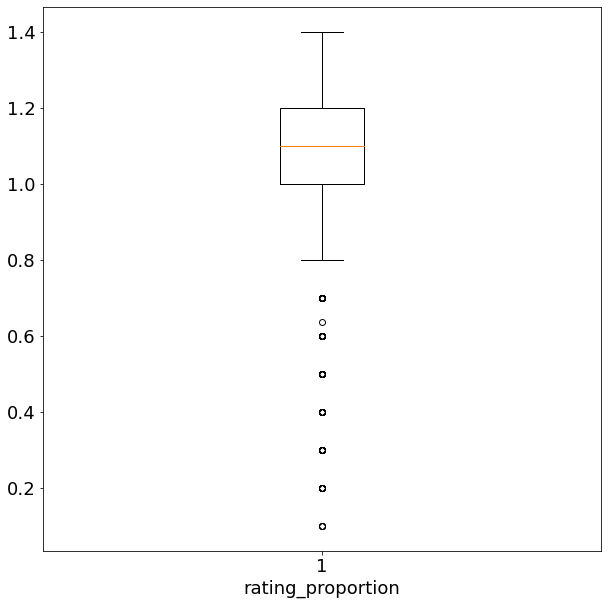

In [81]:
# Visualize current skewness to make sure outliers will not hinder further analysis
plt.figure(figsize=(10,10))
plt.boxplot(ratings_clean['rating_proportion']);
plt.xlabel('rating_proportion')

<Figure size 3600x3600 with 0 Axes>

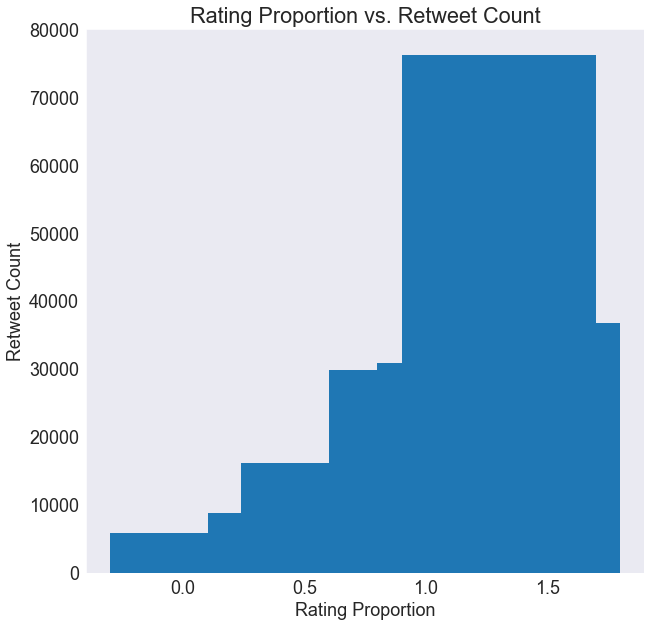

<Figure size 3600x3600 with 0 Axes>

In [82]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
plt.bar(ratings_clean['rating_proportion'], ratings_clean['retweet_count'], edgecolor='None');
plt.xlim(-0.4, 1.9)
plt.title('Rating Proportion vs. Retweet Count')
plt.xlabel('Rating Proportion')
plt.ylabel('Retweet Count')
plt.figure(figsize=(50, 50))

#### Are dog tweets with high ratings favorited by more people than dog tweets with low ratings?

Text(0, 0.5, 'Favorite Count')

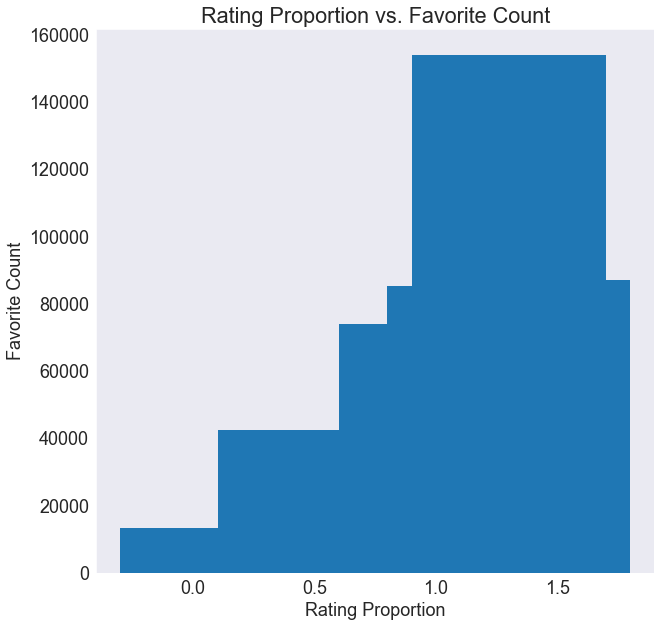

In [84]:
plt.figure(figsize=(10,10))
plt.bar(ratings_clean['rating_proportion'], ratings_clean['favorite_count'], edgecolor='None');
plt.xlim(-0.4, 1.9)
plt.title('Rating Proportion vs. Favorite Count')
plt.xlabel('Rating Proportion')
plt.ylabel('Favorite Count')

#### Does the number of retweets affect the number of people who prefer a certain dog tweet? 

Text(0.5, 0, 'retweet_count')

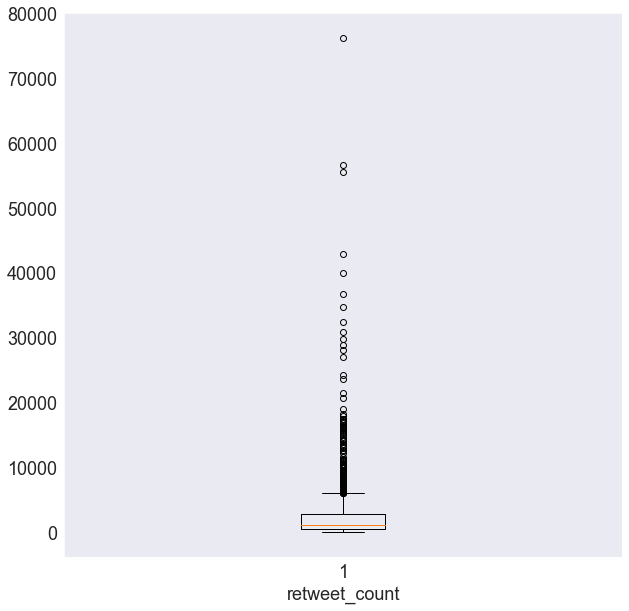

In [85]:
# Visualize possible outliers.
plt.figure(figsize=(10,10))
plt.boxplot(ratings_clean['retweet_count']);
plt.xlabel('retweet_count')

Text(0.5, 0, 'favorite_count')

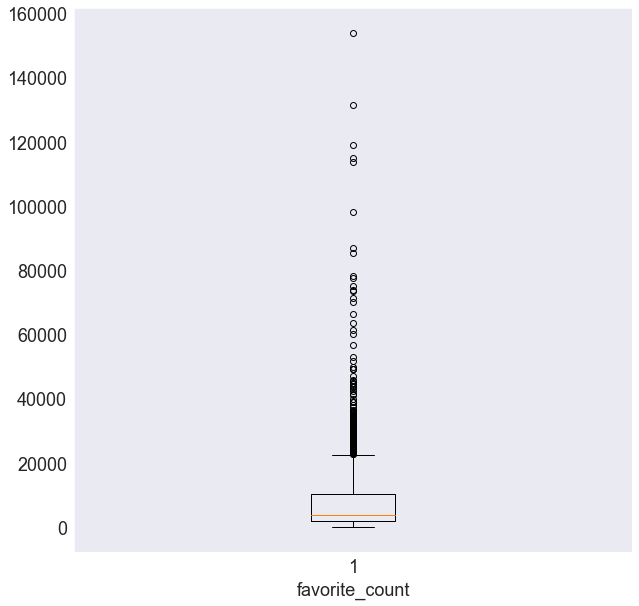

In [86]:
# Visualize possible outliers.
plt.figure(figsize=(10,10))
plt.boxplot(ratings_clean['favorite_count']);
plt.xlabel('favorite_count')

Text(0, 0.5, 'Favorite Count')

<Figure size 1080x1080 with 0 Axes>

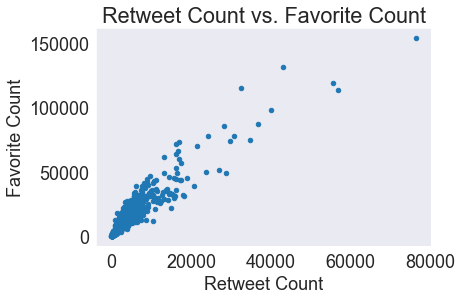

In [87]:
plt.figure(figsize=(15,15))
ratings_clean.plot(x='retweet_count', y='favorite_count', kind='scatter');
plt.title('Retweet Count vs. Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

Text(0, 0.5, 'Favorite Count')

<Figure size 1080x1080 with 0 Axes>

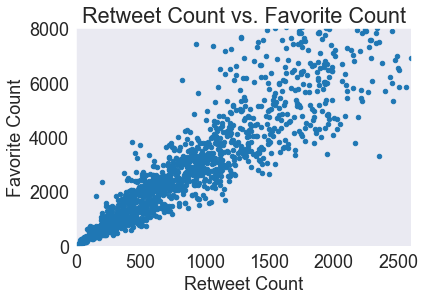

In [89]:
# Repeat the previous cell while zooming in on the dense part of the graph to make sure that the correlation is positive (eliminate outlier effect).
plt.figure(figsize=(15,15))
ratings_clean.plot(x='retweet_count', y='favorite_count', kind='scatter');
plt.xlim(0, 2600)
plt.ylim(0, 8000)
plt.title('Retweet Count vs. Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

#### What is the average rating for each of the 3 most common dog names?

In [90]:
top_3 = list(ratings_clean['name'].value_counts()[0:3].index)
df_top_3 = ratings_clean[ratings_clean['name'].isin(top_3)]
df_top_3.groupby('name', as_index=False)[['name','rating_numerator', 'rating_denominator', 'rating_proportion']].mean()

,name,rating_numerator,rating_denominator,rating_proportion
0,Charlie,11.6,10.0,1.16
1,Cooper,11.3,10.0,1.13
2,Oliver,11.3,10.0,1.13


In [91]:
image_predictions_clean.describe()

,tweet_id,confidence
count,6.225000e+03,6.225000e+03
mean,7.384514e+17,2.631537e-01
std,6.784113e+16,2.908324e-01
min,6.660209e+17,1.740170e-10
25%,6.764706e+17,5.123350e-02
50%,7.119988e+17,1.351790e-01
75%,7.932110e+17,3.796240e-01
max,8.924206e+17,1.000000e+00


In [92]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_level',
 'prediction',
 'confidence',
 'dog_breed']

#### How many predictions are actually breeds of dogs?

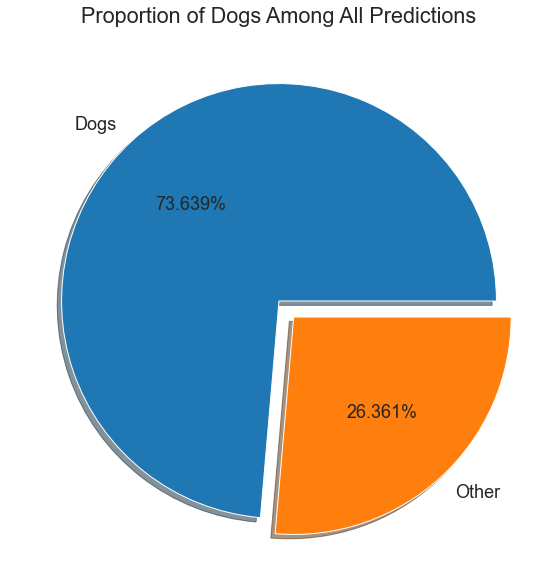

In [93]:
total = len(image_predictions_clean)
dog_predictions = len(image_predictions_clean.query('dog_breed == True'))
other_predictions = len(image_predictions_clean.query('dog_breed == False'))

dog_percent = dog_predictions/total
other_percent = other_predictions/total

plt.figure(figsize=(10,10))
plt.pie([dog_percent, other_percent],explode=(0, 0.1), labels=['Dogs', 'Other'], shadow=True, autopct='%1.3f%%');
plt.title('Proportion of Dogs Among All Predictions')
plt.show()

#### Which prediction level has the highest average confidence value? 

In [94]:
image_predictions_clean.groupby('prediction_level', as_index=False)[['prediction_level', 'confidence']].mean()

,prediction_level,confidence
0,1,0.594548
1,2,0.134589
2,3,0.060324


#### What is the most common prediction for each prediction level?

In [95]:
levels = list(image_predictions_clean.prediction_level.unique())
dicts = []
for level in levels:
    df = image_predictions_clean[image_predictions_clean['prediction_level'] == level]
    dicts.append({'prediction_level': level, 'prediction': df.prediction.mode().values[0]})
result = pd.DataFrame(dicts)

In [96]:
result

,prediction_level,prediction
0,1,golden_retriever
1,2,Labrador_retriever
2,3,Labrador_retriever
